<a href="https://colab.research.google.com/github/LucasMirandaVS/analise-da-populacao-brasileira/blob/main/Coleta_e_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
# web scrapping
import requests as r
from bs4 import BeautifulSoup
# Manipulação dos dados e viz
import pandas as pd
import numpy as np
import seaborn as sns

## Coleta e limpeza

In [2]:
# Definindo o endereço da primeira página
pag1 = r.get('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Brasil_por_popula%C3%A7%C3%A3o')

In [3]:
response1 = pag1.content  #extraindo o conteúdo

In [4]:
# Busca com o beautiful soup
soup1 = BeautifulSoup(response1, 'html.parser')
tabela1 = soup1.find('table', class_ = 'wikitable sortable') # Especificando de acordo com a tag html

In [5]:
# Agora definindo o data frame 
df1 = pd.read_html(str(tabela1))
df1 = pd.concat(df1)

In [6]:
print(df1) # ficou bom

     Posição  Código IBGE         Município Unidade federativa   População
0         1º      3550308         São Paulo          São Paulo  12 396 372
1         2º      3304557    Rio de Janeiro     Rio de Janeiro   6 775 561
2         3º      5300108          Brasília   Distrito Federal   3 094 325
3         4º      2927408          Salvador              Bahia   2 900 319
4         5º      2304400         Fortaleza              Ceará   2 703 391
...      ...          ...               ...                ...         ...
5565   5566º      4322350    União da Serra  Rio Grande do Sul       1 084
5566   5567º      4306924     Engenho Velho  Rio Grande do Sul         932
5567   5568º      5101209        Araguainha        Mato Grosso         909
5568   5569º      3507209              Borá          São Paulo         839
5569   5570º      3166600  Serra da Saudade       Minas Gerais         771

[5570 rows x 5 columns]


In [7]:
df1.rename(columns={'Posição': 'posicao (populacao)', 'Município': 'municipio', 'Unidade federativa':'UF', 
                    'População': 'populacao'}, inplace = True)
df1.drop('UF', axis=1, inplace=True)
df1.drop('Código IBGE', axis = 1, inplace = True)
df1.head()

,posicao (populacao),municipio,populacao
0,1º,São Paulo,12 396 372
1,2º,Rio de Janeiro,6 775 561
2,3º,Brasília,3 094 325
3,4º,Salvador,2 900 319
4,5º,Fortaleza,2 703 391


In [8]:
# Agora pra segunda página
pag2 = r.get('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Brasil_por_PIB')
response2 = pag2.content

In [9]:
# Beautiful Soup
sopa2 = BeautifulSoup(response2, 'html.parser')
tabela2 = sopa2.find('table', class_='wikitable sortable')

In [10]:
# Agora definindo o data frame 
df2 = pd.read_html(str(tabela2))
df2 = pd.concat(df2)

In [11]:
df2.head()

,Posição,Nome do Município,Produto Interno Bruto (em R$ 1 000),UF
0,1,São Paulo,699 288 352,SP
1,2,Rio de Janeiro,337 594 462,RJ
2,3,Brasília,244 682 756,DF
3,4,Belo Horizonte,88 951 168,MG
4,5,Curitiba,84 702 357,PR


In [12]:
df2.rename(columns={'Posição': 'posicao (pib)', 'Nome do Município': 'municipio',
                    'Produto Interno Bruto (em R$ 1 000)': 'PIB(R$1000,00)'}, inplace=True)
df2.drop('UF', axis = 1, inplace = True)
df2.head()

,posicao (pib),municipio,"PIB(R$1000,00)"
0,1,São Paulo,699 288 352
1,2,Rio de Janeiro,337 594 462
2,3,Brasília,244 682 756
3,4,Belo Horizonte,88 951 168
4,5,Curitiba,84 702 357


In [13]:
# Juntando os dataframes
dfFinal = pd.merge(df1, df2, on="municipio")
dfFinal.head()

,posicao (populacao),municipio,populacao,posicao (pib),"PIB(R$1000,00)"
0,1º,São Paulo,12 396 372,1,699 288 352
1,2º,Rio de Janeiro,6 775 561,2,337 594 462
2,3º,Brasília,3 094 325,3,244 682 756
3,4º,Salvador,2 900 319,9,62 717 483
4,5º,Fortaleza,2 703 391,10,61 579 403


In [14]:
dfFinal.info() # as colunas esão no formato de caracter

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6157 entries, 0 to 6156
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   posicao (populacao)  6157 non-null   object
 1   municipio            6157 non-null   object
 2   populacao            6157 non-null   object
 3   posicao (pib)        6157 non-null   int64 
 4   PIB(R$1000,00)       6157 non-null   object
dtypes: int64(1), object(4)
memory usage: 288.6+ KB


In [15]:
# Transformando a coluna posicao(pib) em int
dfFinal['posicao (populacao)'] = pd.Series([x[0].replace('º', '') if x[0] != '–' else None for x in dfFinal['posicao (populacao)'].str.split()]).astype(int)

In [16]:
# Transformando a coluna população
dfFinal['populacao'] = dfFinal['populacao'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
dfFinal['populacao'] = pd.to_numeric(dfFinal['populacao'])
dfFinal.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,posicao (populacao),municipio,populacao,posicao (pib),"PIB(R$1000,00)"
0,1,São Paulo,12396372,1,699 288 352
1,2,Rio de Janeiro,6775561,2,337 594 462
2,3,Brasília,3094325,3,244 682 756
3,4,Salvador,2900319,9,62 717 483
4,5,Fortaleza,2703391,10,61 579 403


In [17]:
# PIB
dfFinal['PIB(R$1000,00)'] = dfFinal['PIB(R$1000,00)'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
dfFinal['PIB(R$1000,00)'] = pd.to_numeric(dfFinal['PIB(R$1000,00)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [18]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6157 entries, 0 to 6156
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   posicao (populacao)  6157 non-null   int64 
 1   municipio            6157 non-null   object
 2   populacao            6157 non-null   int64 
 3   posicao (pib)        6157 non-null   int64 
 4   PIB(R$1000,00)       6157 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 288.6+ KB


In [19]:
# Ordenando os dados
dfFinal.sort_values(by=['PIB(R$1000,00)'])

,posicao (populacao),municipio,populacao,posicao (pib),"PIB(R$1000,00)"
5996,5394,Santo Antônio dos Milagres,2172,5570,12993
6146,5560,Miguel Leão,1239,5569,14725
579,417,Viçosa,79910,5568,15769
582,1399,Viçosa,25655,5568,15769
585,5498,Viçosa,1731,5568,15769
...,...,...,...,...,...
7,8,Curitiba,1963726,5,84702357
5,6,Belo Horizonte,2530701,4,88951168
2,3,Brasília,3094325,3,244682756
1,2,Rio de Janeiro,6775561,2,337594462


Agora vou pra parte de visualização.

# Visualizando os dados

Mesmo não sendo um conjunto de variáveis muito grande, vale a pena investigar as suas relações.

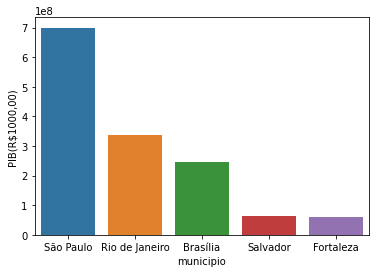

In [20]:
# Visualizando os maiores PIBs
sns.barplot(x=dfFinal['municipio'].head(5),y=dfFinal['PIB(R$1000,00)'],data=dfFinal)

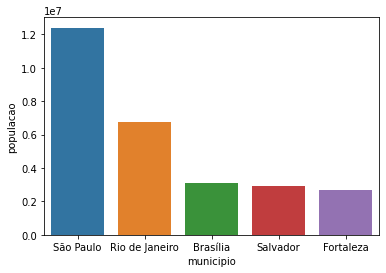

In [21]:
# População
sns.barplot(x=dfFinal['municipio'].head(5),y=dfFinal['populacao'],data=dfFinal)

Não coincidentemente, os maiores municipios são também os mais ricos, pois tem mais gente pra produzir.

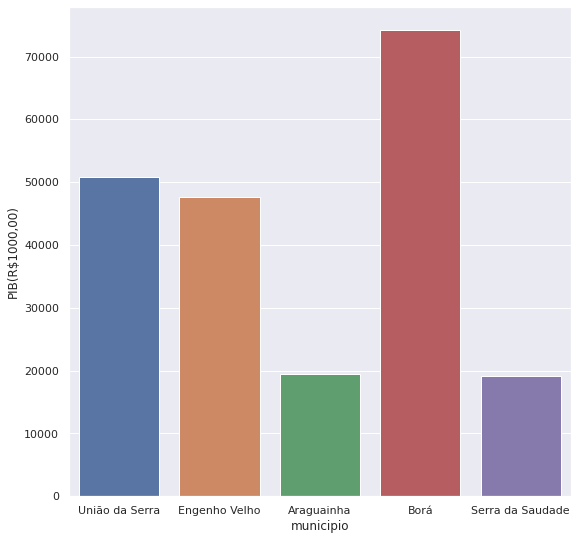

In [28]:
# Agora vendo os menores valores
# PIB
sns.barplot(x=dfFinal['municipio'].tail(5),y=dfFinal['PIB(R$1000,00)'],data=dfFinal)
sns.set(rc={'figure.figsize':(9,11)})

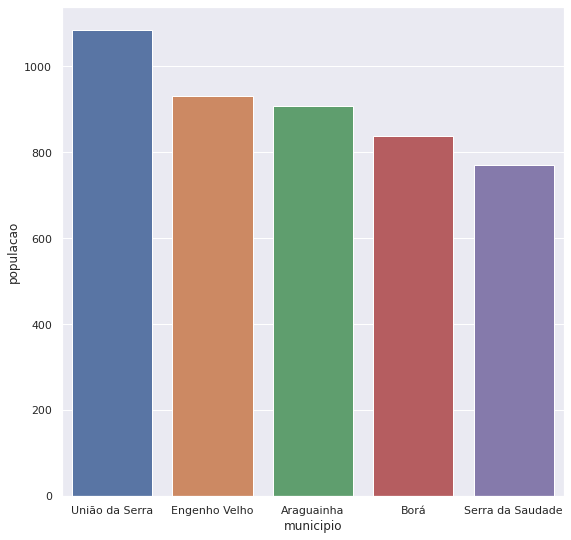

In [23]:
# PIB
sns.barplot(x=dfFinal['municipio'].tail(5),y=dfFinal['populacao'],data=dfFinal)
sns.set(rc={'figure.figsize':(9,9)})

O mesmo fenomeno ocorre nos menores valores, esse é mais um indício de correlação.

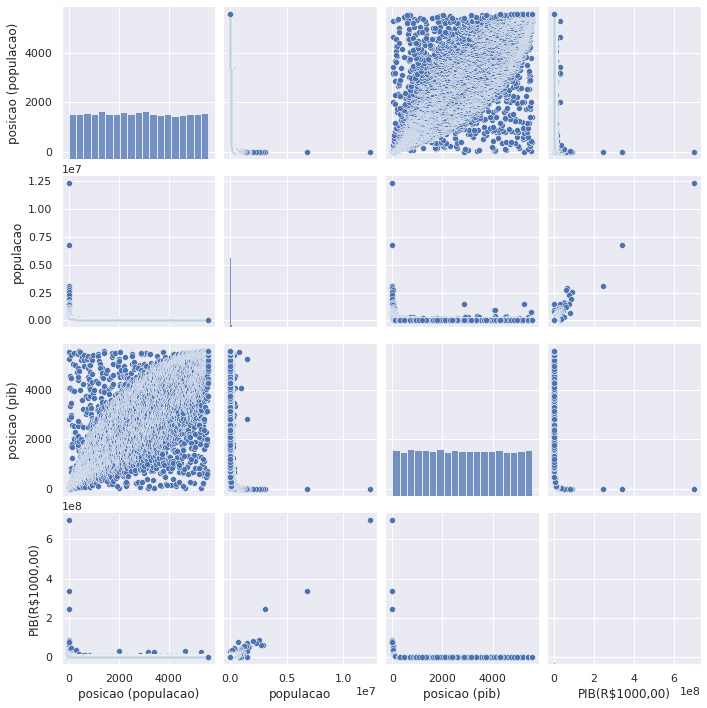

In [24]:
# Analisando a amostra como um todo
sns.pairplot(dfFinal)

Pode parecer um pouco confusos. Mas um olhar mais detalhado para os graficos que relacionam população e PIB aparentam ter uma correlação positiva. Vou investigar mais a fundo.

In [25]:
# Correlação
df_special = dfFinal[['populacao', 'PIB(R$1000,00)', 'posicao (populacao)', 'posicao (pib)']]
df_special.corr()

,populacao,"PIB(R$1000,00)",posicao (populacao),posicao (pib)
populacao,1.000000,0.944723,-0.223541,-0.188648
"PIB(R$1000,00)",0.944723,1.000000,-0.134132,-0.151554
posicao (populacao),-0.223541,-0.134132,1.000000,0.738306
posicao (pib),-0.188648,-0.151554,0.738306,1.000000


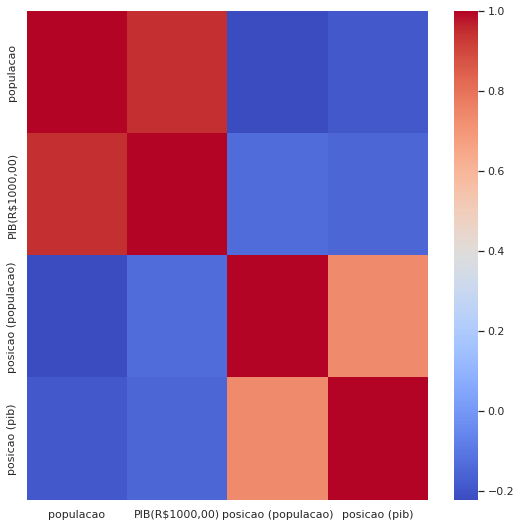

In [26]:
# Agora visualizando a correlação com heatmap
sns.heatmap(df_special.corr(), cmap='coolwarm')

Como esperado, a correlação foi forte e positiva.

In [27]:
# Exportando em um CSV
dfFinal.to_csv('Dataframe.csv', index = False)